# Problem Statement:-
Netflix leverages data science, AI, and ML to enhance its recommendation systems and understand customer behavior. To support data-driven decision-making, we analyze a dataset of over 9,000 movies to gain insights into trends, popularity, and audience preferences. Our objective is to determine the most frequent movie genre, identify the highest and lowest-rated movies based on votes and popularity, and analyze the distribution of movie releases across different years.

In [226]:
# importing lib.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [227]:
df = pd.read_csv('Movies.csv', lineterminator='\n')

In [228]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Check Shape & Basic Info

In [230]:
df.shape

(9827, 9)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


# Handling Duplicates

In [233]:
df.duplicated().sum()

0

# Summary statistics (numerical columns)

In [235]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Check Outliers for Popularity columns

In [237]:
# Using IQR to detect outliers
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_filtered = df[(df['Popularity'] >= lower_bound) & (df['Popularity'] <= upper_bound)]

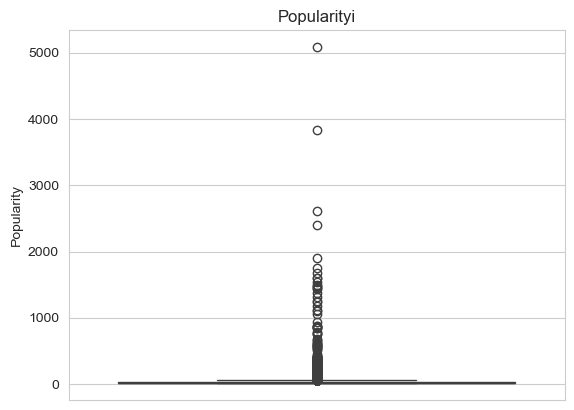

In [238]:
plt.boxplot(x=df["Popularity"])
sns.boxplot(y=df["Popularity"])
plt.title("Popularityi")
plt.show()

In [239]:
q1 = df["Popularity"].quantile(0.25)
q2 = df["Popularity"].quantile(0.50)
q3 = df["Popularity"].quantile(0.75)

iqr= q3-q1
upper_whisker = q3+1.5*iqr
lower_whisker = q1-1.5*iqr

print("q1",q1)
print("q2",q2)
print("q3",q3)
print("iqr",iqr)
print("upper_whisker",upper_whisker)
print("lower_whisker",lower_whisker)

q1 16.128500000000003
q2 21.199
q3 35.1915
iqr 19.062999999999995
upper_whisker 63.78599999999999
lower_whisker -12.46599999999999


In [240]:
df["Release_Date"] = pd.to_datetime(df['Release_Date'])
print(df["Release_Date"].dtype)

datetime64[ns]


In [241]:
df["Release_Date"] = df["Release_Date"].dt.year
print(df["Release_Date"].dtype)

int32


In [242]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [243]:
col =['Overview','Original_Language','Poster_Url']

In [244]:
df.drop(col,axis=1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [245]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [246]:
def catigorize_col(df,col,labels):
    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col],edges,labels = labels,duplicates='drop')
    return df

In [247]:
labels = ['Not_Popular','Below_Avg','Averag','Popular']

catigorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()


['Popular', 'Below_Avg', 'Averag', 'Not_Popular', NaN]
Categories (4, object): ['Not_Popular' < 'Below_Avg' < 'Averag' < 'Popular']

In [248]:
df.head()
# Convert the numerical col in categorical 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_Avg,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Averag,"Action, Adventure, Thriller, War"


In [249]:
df["Vote_Average"].value_counts()

Vote_Average
Not_Popular    2467
Popular        2450
Averag         2412
Below_Avg      2398
Name: count, dtype: int64

In [250]:
# Removes rows (or columns) containing NaN values.
df.dropna(inplace= True)

In [251]:
# Counts the number of missing values per column.
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

# Split Genres into a list and explode dataframe to have only one genre per row for each movie.

In [253]:
df['Genre'] = df['Genre'].str.split(', ')

In [254]:
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [255]:
# Change Genre col name to Category 
df['Genre'] = df['Genre'].astype('category')

In [256]:
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [257]:
df.info()
# Increase the number of rows from 9827 to 25552

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [258]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [259]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# Data Visualization

In [261]:
#sns.set_style('whitegrid')

# 1. What is the most frequent genre of movies released on Netflix?.

In [263]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

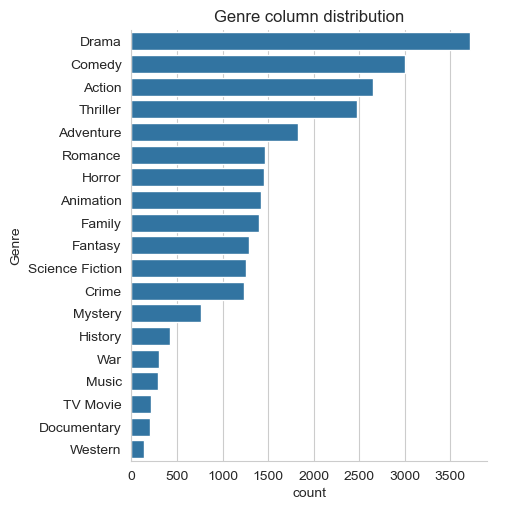

In [264]:
sns.catplot(y= 'Genre',data = df,kind='count',
            order= df['Genre'].value_counts().index)
plt.title("Genre column distribution")
plt.show()

# 2. Which has the highest votes in vote Average column 

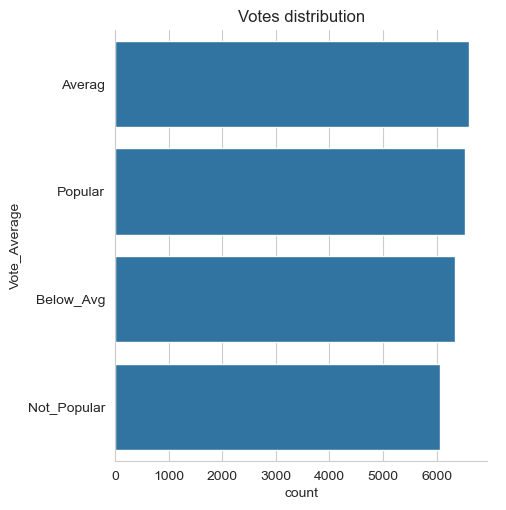

In [266]:
sns.catplot(y= 'Vote_Average',data =df,kind='count',
           order= df['Vote_Average'].value_counts().index,)
plt.title("Votes distribution")
plt.show()

# 3. What movie got the highest popularity? what's its genre?

In [268]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# 4. What movie got the lowest popularity? what's its genre?

In [270]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Averag,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Averag,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Averag,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


# 5. Which year has the most filmmed movies?

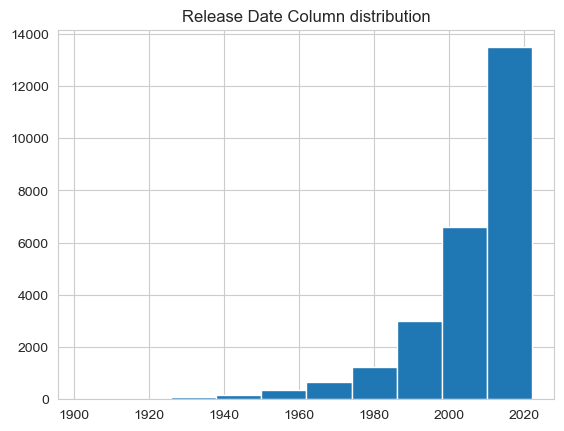

In [272]:
df['Release_Date'].hist()
plt.title("Release Date Column distribution")
plt.show()

# Conclusion